<b> Batch gradient descent to find the optimal parameters for Simple Linear Regression model. </b>

In [1]:
from __future__ import print_function
import sys
from pyspark import SparkContext
import numpy as np

In [2]:
sc = SparkContext()
lines = sc.textFile("taxi-data-sorted-small.csv.bz2")
taxilines = lines.map(lambda x: x.split(','))

In [3]:
def correctRows(p):
    '''This function checks if the line has 17 values and check if trip distance (5) and amount (11) have the
    following conditions met'''
    if (len(p) == 17):
        if (isfloat(p[5]) and isfloat(p[11])):
            if (float(p[5]) > 1 and float(p[5]) < 1000):
                if (float(p[11]) > 1 and float(p[11]) < 600):
                    return p


def isfloat(value):
    '''This function checks if the value is float or not'''
    try:
        float(value)
        return True
    except:
        return False


In [5]:
# applying the function to the rows of data
taxilinesCorrected = taxilines.filter(correctRows)
myRDD = taxilinesCorrected.map(lambda x: (float(x[11]), float(x[5])))

myRDD.cache()
myRDD.take(2)

[(6.5, 1.71), (6.0, 1.21)]

In [6]:
#initialization parameters
size = myRDD.count()
num_iteration = 100
beta = 0.1
learningRate = 0.01
precision = 0.01
cost_all = []

In [7]:
#main iterative part of gradient descent algorithm
for i in range(num_iteration):

    #code for gradient descent
    gradientCost = myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1], beta)))) \
        .map(lambda x: (x[0] * x[1], x[1] ** 2)).reduce(lambda x, y: (x[0] + y[0], x[1] + y[1]))

    cost = gradientCost[1]

    gradient = (-1 / float(size)) * gradientCost[0]

    print("Iteration: ", i, " Beta: ", beta, " Cost: ", cost)
    beta = beta - learningRate * gradient

    #containing all costs for all iterations
    cost_all.append(cost)

    if i != 0:

        #finding the the current and previous cost
        cost_current = cost_all[i]
        cost_previous = cost_all[i-1]

        #stopping criteria for precision
        if np.abs(cost_current - cost_previous) < precision:
            print('Stopped at iteration: ', i)
            break

sc.stop()

Iteration:  0  Beta:  0.1  Cost:  422104568.70971507
Iteration:  1  Beta:  0.9221545878303155  Cost:  241878776.08963937
Iteration:  2  Beta:  1.529310957707878  Cost:  143588379.72841108
Iteration:  3  Beta:  1.9776923970862224  Cost:  89983388.58699211
Iteration:  4  Beta:  2.3088194759631024  Cost:  60748639.50006555
Iteration:  5  Beta:  2.553354893213075  Cost:  44804778.00552855
Iteration:  6  Beta:  2.733942873188744  Cost:  36109416.24268228
Iteration:  7  Beta:  2.8673060435565945  Cost:  31367195.15573456
Iteration:  8  Beta:  2.965793967353989  Cost:  28780912.784648597
Iteration:  9  Beta:  3.0385267248849193  Cost:  27370422.556467988
Iteration:  10  Beta:  3.0922394422830175  Cost:  26601178.367962636
Iteration:  11  Beta:  3.131905970931534  Cost:  26181652.865604978
Iteration:  12  Beta:  3.1611994710790454  Cost:  25952854.715732507
Iteration:  13  Beta:  3.1828325501542394  Cost:  25828074.236144133
Iteration:  14  Beta:  3.1988084529284775  Cost:  25760022.251910165


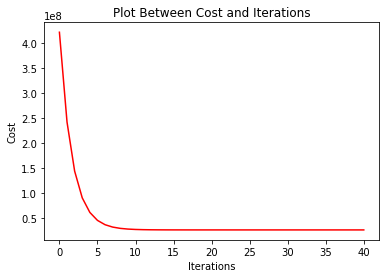

In [10]:
import matplotlib.pyplot as plt

y = cost_all
x = range(len(y))

plt.title("Plot Between Cost and Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.plot(x, y, color ="red")
plt.show()